TABLE OF CONTENT

01 -- IMPORTING LIBRARIES

02 -- IMPORTING DATA

03 -- DEPENDENTS & AGE GROUPINGS

04 -- CUSTOMERS ORDERS (BY HOUR OF THE DAY)

06 -- CUSTOMER MARITAL STATUS VS SPENDING FLAG

07 -- INSTACART PRODUCTS STATISTICS

08 -- CUSTOMER BEHAVIOUR IN DIFFERENT REGIONS

09 -- ORDER VOLUME BY DEMOGRAPHICS & PRODUCT CATEGORY

10 -- CUSTOMER VALUE PYRAMID

# 01 IMPORTING LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 02 IMPORTING DATA

In [2]:
path = r'/Users/woodoooo/Desktop/Instacart Basket Analysis'

# small sapmle (30%)
df_ords_prods_active_customers_small = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', '4.10_df_ords_prods_active_customers_small.pkl'))

In [21]:
#departments data 
df_departments = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [22]:
df_ords_prods_active_customers_small.shape

(9288468, 35)

In [4]:
pd.set_option('display.max_columns', None)

In [7]:
df_ords_prods_active_customers_small.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,avg_spending_flag,user_median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,low-activity_flag,age_group,income_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000"
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000"
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000"
6,2398795,1,2,3,7,15.0,False,10258,2,0,Pistachios,117,19,3.0,Low-range,Regularly busy,Slowest day,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000"
10,2398795,1,2,3,7,15.0,False,13032,6,0,Cinnamon Toast Crunch,121,14,4.0,Low-range,Regularly busy,Slowest day,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000"


# 03 DEPENDENTS & AGE GROUPINGS

In [5]:
# Create dependents group flag
df_ords_prods_active_customers_small.loc[df_ords_prods_active_customers_small['n_dependants'] <= 1, 'dependents_flag'] = 'Small family or single'
df_ords_prods_active_customers_small.loc[df_ords_prods_active_customers_small['n_dependants'] == 2, 'dependents_flag'] = 'Medium family'
df_ords_prods_active_customers_small.loc[df_ords_prods_active_customers_small['n_dependants'] >= 3, 'dependents_flag'] = 'Large family'

In [6]:
df_ords_prods_active_customers_small.groupby('dependents_flag')['prices'].agg(['sum', 'mean', 'count'])

,sum,mean,count
dependents_flag,,,
Large family,18164916.0,7.795248,2330255
Medium family,18073766.0,7.783619,2322026
Small family or single,36111224.0,7.788992,4636187


In [7]:
df_ords_prods_active_customers_small['dependents_flag'].value_counts()

dependents_flag
Small family or single    4636187
Large family              2330255
Medium family             2322026
Name: count, dtype: int64

In [8]:
# Defining profiles by age
def age_group(age):
    if age <= 18:
        return 'Teen'
    elif 18 < age <= 29:
        return 'Young Adult'
    elif 29 < age <= 44:
        return 'Adult'
    elif 44 < age <= 59:
        return 'Middle Aged'
    else:
        return 'Senior'

In [9]:
# Apply the function to create the new column
df_ords_prods_active_customers_small['age_group'] = \
    df_ords_prods_active_customers_small['age'].apply(age_group)

In [10]:
df_ords_prods_active_customers_small['age_group'].value_counts(dropna = False)

age_group
Senior         3171252
Middle Aged    2193582
Adult          2178001
Young Adult    1602162
Teen            143471
Name: count, dtype: int64

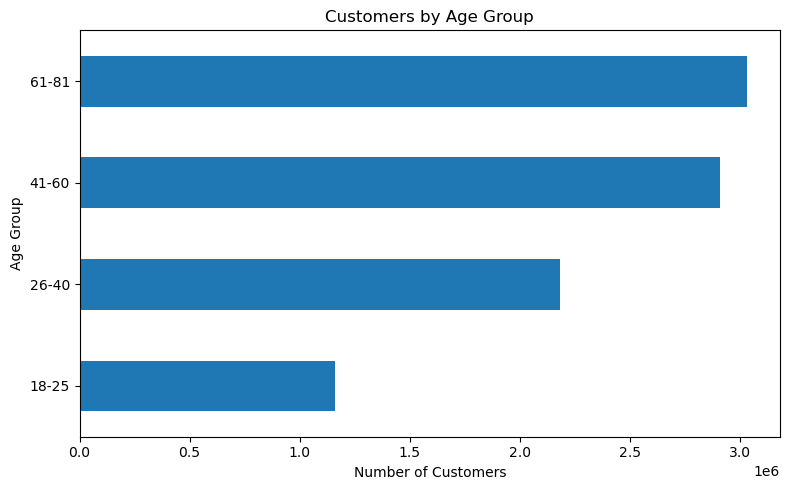

In [83]:
# Count customers by age group
age_counts = df_ords_prods_active_customers_small['age_group'].value_counts()

# Plot horizontal bar chart
age_counts.sort_values().plot.barh(
    figsize=(8,5)
)

plt.title('Customers by Age Group')
plt.xlabel('Number of Customers')
plt.ylabel('Age Group')
plt.tight_layout()

# Save chart to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_by_age_group.png'), dpi=300)

plt.show()

# 04 CUSTOMERS ORDERS (BY HOUR OF THE DAY)

In [127]:
# Filter for Teens
teens = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['age_group'] == 'Teen'
]

# Count orders by hour of day
teen_hours = teens['order_hour_of_day'].value_counts().sort_index()

In [129]:
# Filter for Middle Aged
middle_aged = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['age_group'] == 'Middle Aged'
]

# Count orders by hour of day
middle_aged_hours = middle_aged['order_hour_of_day'].value_counts().sort_index()

In [130]:
# Filter for Young Adult
young_adult = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['age_group'] == 'Young Adult'
]

# Count orders by hour of day
young_adult_hours = young_adult['order_hour_of_day'].value_counts().sort_index()

In [132]:
# Filter for Adult
adult = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['age_group'] == 'Adult'
]

# Count orders by hour of day
adult_hours = adult['order_hour_of_day'].value_counts().sort_index()

In [128]:
# Filter for Senior
Senior = df_ords_prods_active_customers_small[df_ords_prods_active_customers_small['age_group'] == 'Senior']

# Count orders by hour of day
Senior_hours = Senior['order_hour_of_day'].value_counts().sort_index()

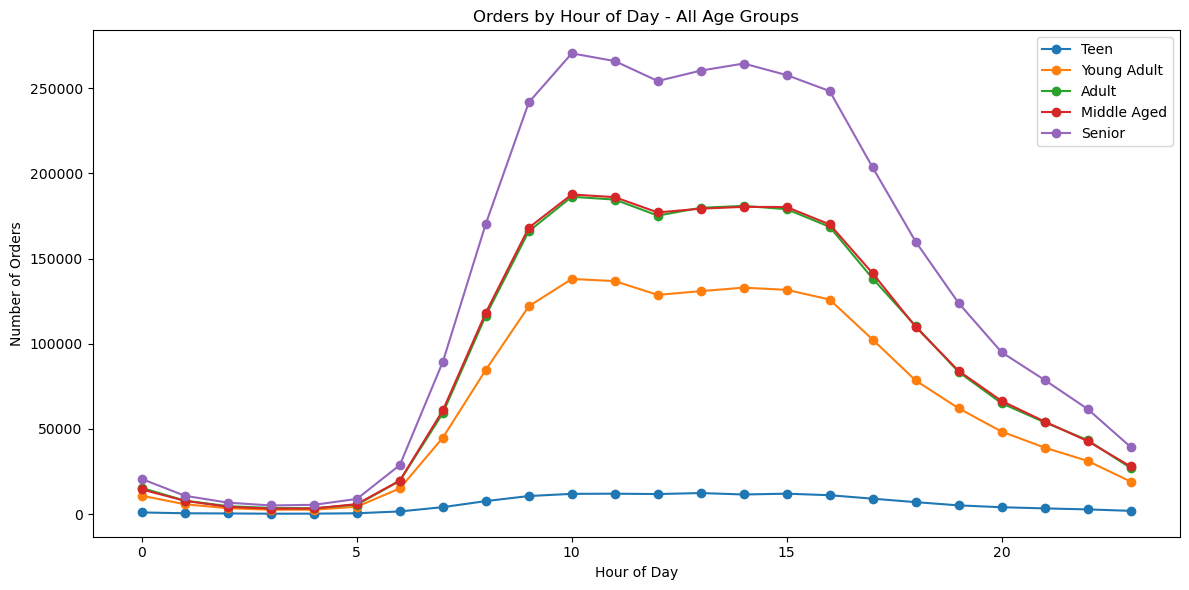

In [141]:
# Combine into one DataFrame
age_group_hours_df = pd.DataFrame({
    'Teen': teen_hours,
    'Young Adult': young_adult_hours,
    'Adult': adult_hours,
    'Middle Aged': middle_aged_hours,
    'Senior': Senior_hours
})

# Plot
plt.figure(figsize=(12,6))
for column in age_group_hours_df.columns:
    plt.plot(age_group_hours_df.index, age_group_hours_df[column], marker='o', label=column)

plt.title('Orders by Hour of Day - All Age Groups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_hour_all_age_groups.png'), dpi=300)

plt.show()

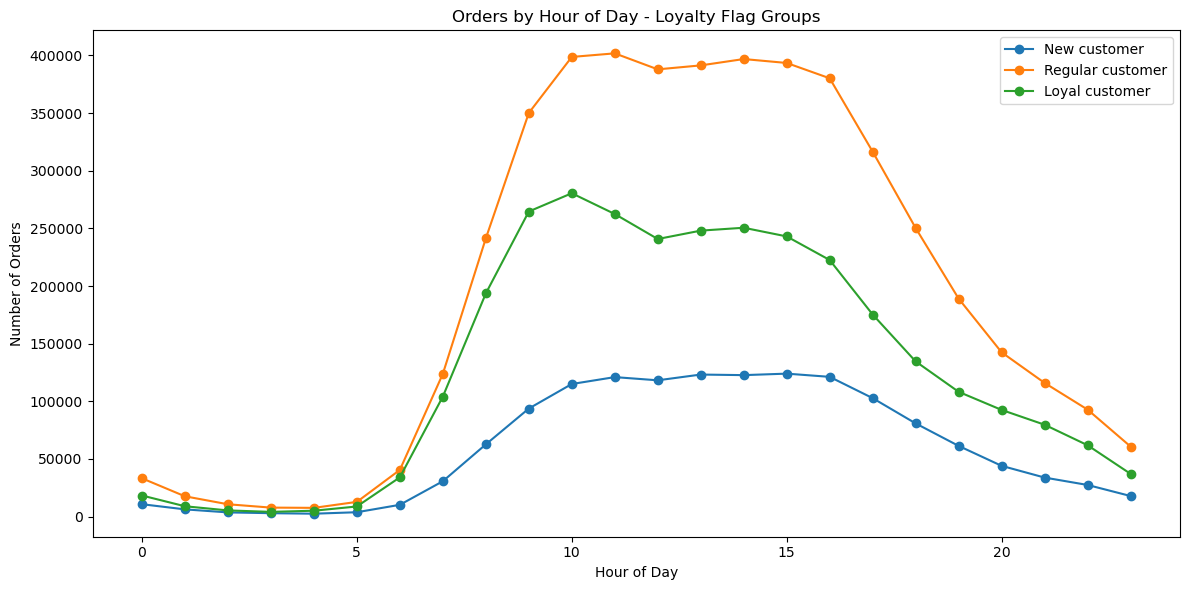

In [142]:
# Prepare data for each loyalty_flag group
loyalty_groups = df_ords_prods_active_customers_small['loyalty_flag'].unique()

# Create a DataFrame to hold counts by hour for each loyalty group
loyalty_hours_df = pd.DataFrame()

for group in loyalty_groups:
    counts_by_hour = df_ords_prods_active_customers_small[
        df_ords_prods_active_customers_small['loyalty_flag'] == group
    ]['order_hour_of_day'].value_counts().sort_index()
    
    loyalty_hours_df[group] = counts_by_hour

# Plot
plt.figure(figsize=(12,6))
for column in loyalty_hours_df.columns:
    plt.plot(loyalty_hours_df.index, loyalty_hours_df[column], marker='o', label=column)

plt.title('Orders by Hour of Day - Loyalty Flag Groups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_hour_loyalty_flag.png'), dpi=300)

plt.show()

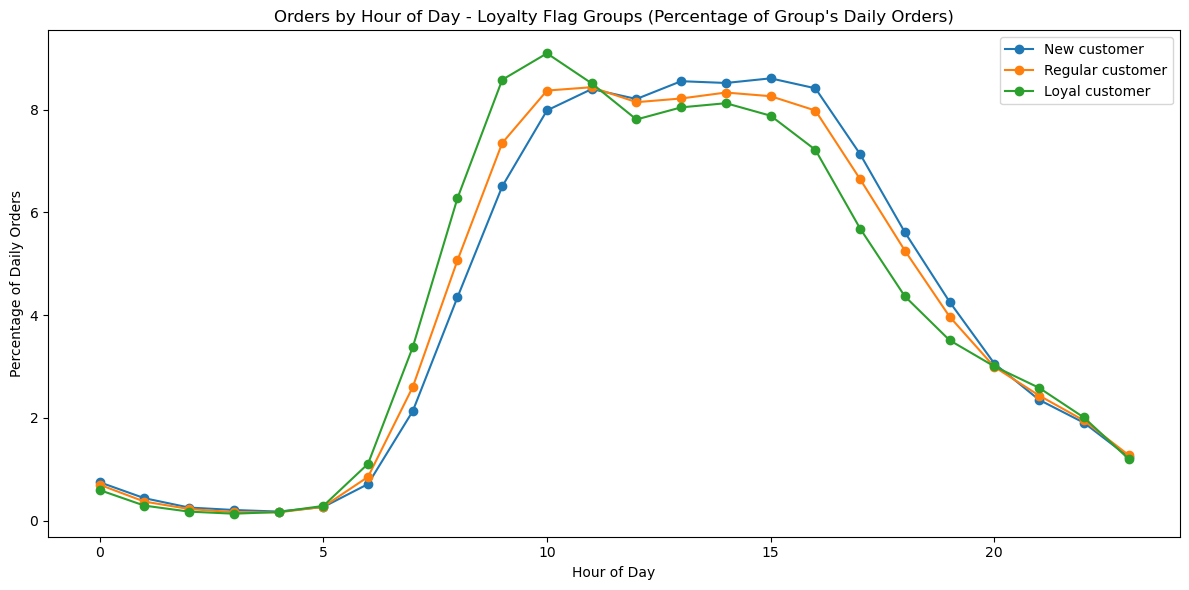

In [143]:
# Normalize to percentage for each loyalty group
loyalty_hours_pct = loyalty_hours_df.div(loyalty_hours_df.sum(axis=0), axis=1) * 100

# Plot normalized chart
plt.figure(figsize=(12,6))
for column in loyalty_hours_pct.columns:
    plt.plot(loyalty_hours_pct.index, loyalty_hours_pct[column], marker='o', label=column)

plt.title('Orders by Hour of Day - Loyalty Flag Groups (Percentage of Group\'s Daily Orders)')
plt.xlabel('Hour of Day')
plt.ylabel('Percentage of Daily Orders')
plt.legend()
plt.tight_layout()

# Save chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_hour_loyalty_flag_percentage.png'), dpi=300)

plt.show()

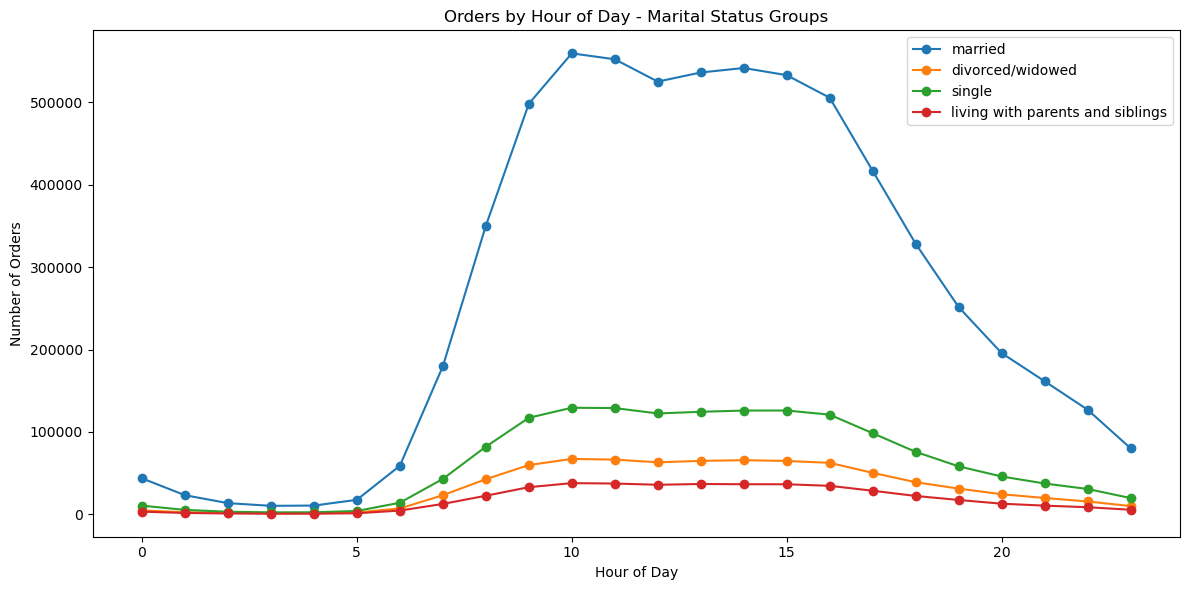

In [144]:
# Get unique marital status groups
marital_groups = df_ords_prods_active_customers_small['marital_status'].unique()

# Create a DataFrame to hold counts by hour for each marital status
marital_hours_df = pd.DataFrame()

for group in marital_groups:
    counts_by_hour = df_ords_prods_active_customers_small[
        df_ords_prods_active_customers_small['marital_status'] == group
    ]['order_hour_of_day'].value_counts().sort_index()
    
    marital_hours_df[group] = counts_by_hour

# Plot multi-line chart
plt.figure(figsize=(12,6))
for column in marital_hours_df.columns:
    plt.plot(marital_hours_df.index, marital_hours_df[column], marker='o', label=column)

plt.title('Orders by Hour of Day - Marital Status Groups')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.legend()
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_hour_marital_status.png'), dpi=300)

plt.show()

# 06 CUSTOMERS MARITAL STATUS VS SPENDING FLAG

In [79]:
# Create a crosstab of marital status vs spending flag
marital_vs_avg_spending = pd.crosstab(
    df_ords_prods_active_customers_small['marital_status'],
    df_ords_prods_active_customers_small['avg_spending_flag']
).fillna(0)

print(marital_vs_avg_spending)

avg_spending_flag                 High spender  Low spender
marital_status                                             
divorced/widowed                          2547       789899
living with parents and siblings          1419       442222
married                                  19323      6503400
single                                    5692      1523966


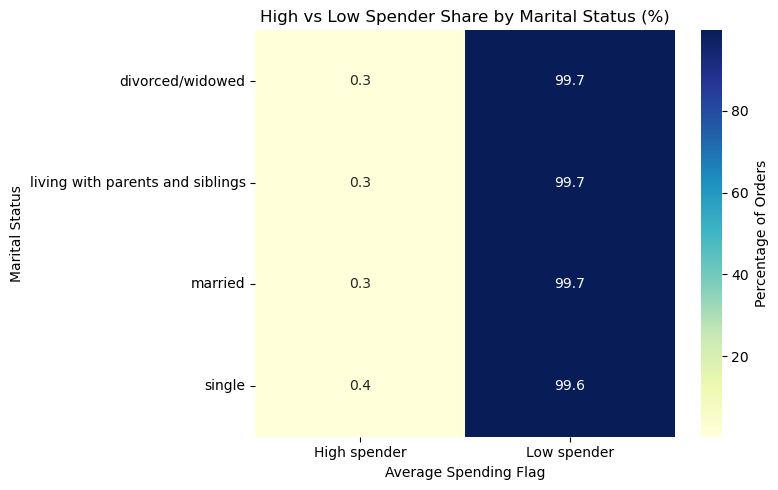

In [80]:
# --- Create percentage table ---
pct_tbl = pd.crosstab(
    df_ords_prods_active_customers_small['marital_status'],
    df_ords_prods_active_customers_small['avg_spending_flag'],
    normalize='index'  # normalize within each marital status
) * 100

# --- Plot heatmap ---
plt.figure(figsize=(8,5))
sns.heatmap(
    pct_tbl,
    annot=True,          # show values
    fmt=".1f",           # one decimal place
    cmap="YlGnBu",       # color palette
    cbar_kws={'label': 'Percentage of Orders'}
)

# Add labels and title
plt.title('High vs Low Spender Share by Marital Status (%)')
plt.xlabel('Average Spending Flag')
plt.ylabel('Marital Status')

plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'marital_vs_spending_heatmap.png'), dpi=300)

plt.show()

In [163]:
pd.set_option('display.max_columns', None)

In [164]:
df_ords_prods_active_customers_small.liz

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,Busiest day,Busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,avg_spending_flag,user_median_order_frequency,order_frequency_flag,gender,state,age,date_joined,n_dependants,marital_status,income,region,low-activity_flag,age_group,income_flag,dependents_flag
0,2539329,1,1,2,8,NaN,True,196,1,0,Soda,77,7,9.0,Mid-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,Adult,"Low income ≤ 67,000",Large family
2,2539329,1,1,2,8,NaN,True,12427,3,0,Original Beef Jerky,23,19,4.4,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,Adult,"Low income ≤ 67,000",Large family
3,2539329,1,1,2,8,NaN,True,26088,4,0,Aged White Cheddar Popcorn,23,19,4.7,Low-range,Regularly busy,Regularly busy day,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,Adult,"Low income ≤ 67,000",Large family
6,2398795,1,2,3,7,15.0,False,10258,2,0,Pistachios,117,19,3.0,Low-range,Regularly busy,Slowest day,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,Adult,"Low income ≤ 67,000",Large family
10,2398795,1,2,3,7,15.0,False,13032,6,0,Cinnamon Toast Crunch,121,14,4.0,Low-range,Regularly busy,Slowest day,Fewest orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,False,Adult,"Low income ≤ 67,000",Large family


In [118]:
df_ords_prods_active_customers_small['marital_status'].value_counts()

marital_status
married                             6522723
single                              1529658
divorced/widowed                     792446
living with parents and siblings     443641
Name: count, dtype: int64

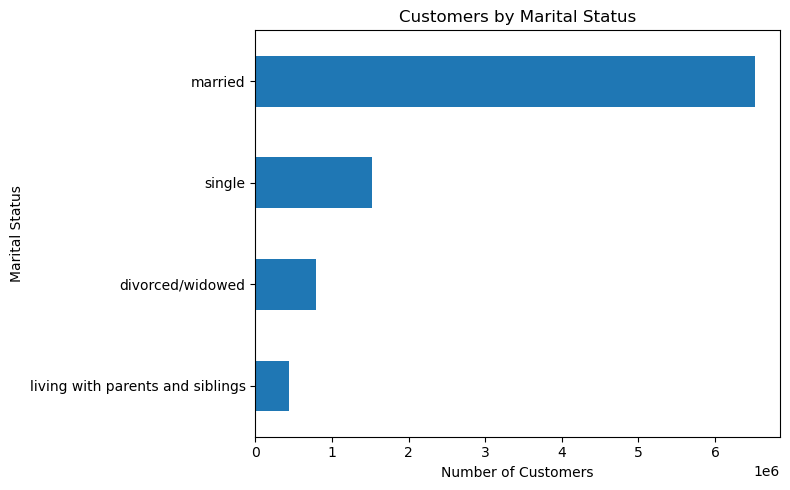

In [90]:
# Count marital status occurrences
marital_counts = df_ords_prods_active_customers_small['marital_status'].value_counts()

# Plot horizontal bar chart
marital_counts.sort_values().plot.barh(
    figsize=(8,5)
)

plt.title('Customers by Marital Status')
plt.xlabel('Number of Customers')
plt.ylabel('Marital Status')
plt.tight_layout()

# Save chart to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_by_marital_status.png'), dpi=300)

plt.show()

In [38]:
df_ords_prods_active_customers_small['loyalty_flag'].value_counts(dropna=False)

loyalty_flag
Regular customer    4763650
Loyal customer      3084148
New customer        1440670
Name: count, dtype: int64

In [36]:
# Basic statistics for order frequency by loyalty group
df_ords_prods_active_customers_small.groupby('loyalty_flag')['user_median_order_frequency'].describe()

,count,mean,std,min,25%,50%,75%,max
loyalty_flag,,,,,,,,
Loyal customer,3084148.0,5.170340,1.699297,0.0,4.0,5.0,7.0,14.0
New customer,1440670.0,18.036015,8.887168,0.0,10.0,17.0,28.0,30.0
Regular customer,4763650.0,10.614161,5.094259,0.0,7.0,9.0,13.0,30.0


In [15]:
df_ords_prods_active_customers_small['order_frequency_flag'].value_counts(dropna=False)

order_frequency_flag
Frequent customer        6360411
Regular customer         2059524
Non-frequent customer     868533
Name: count, dtype: int64

# 07 INSTACART PRODUCTS STATISTICS

In [84]:
# Count the number of unique products in each department
unique_products_per_dept = (
    df_ords_prods_active_customers_small
    .groupby('department_id')['product_name']
    .nunique()
    .reset_index(name='unique_products')
)

# Merge with department name mapping
unique_products_per_dept_named = unique_products_per_dept.merge(
    df_departments.rename(columns={'Unnamed: 0': 'department_id'}),
    on='department_id',
    how='left'
)

# Sort by number of unique products (descending)
unique_products_per_dept_named = unique_products_per_dept_named.sort_values('unique_products', ascending=False)

print(unique_products_per_dept_named)

    department_id  unique_products       department
10             11             6237    personal care
18             19             6116           snacks
12             13             5189           pantry
6               7             4231        beverages
0               1             3927           frozen
15             16             3399       dairy eggs
16             17             2984        household
14             15             2038     canned goods
8               9             1810  dry goods pasta
3               4             1666          produce
2               3             1488           bakery
19             20             1294             deli
20             21             1128          missing
5               6             1101    international
13             14             1090        breakfast
17             18             1055           babies
4               5             1003          alcohol
7               8              948             pets
11          

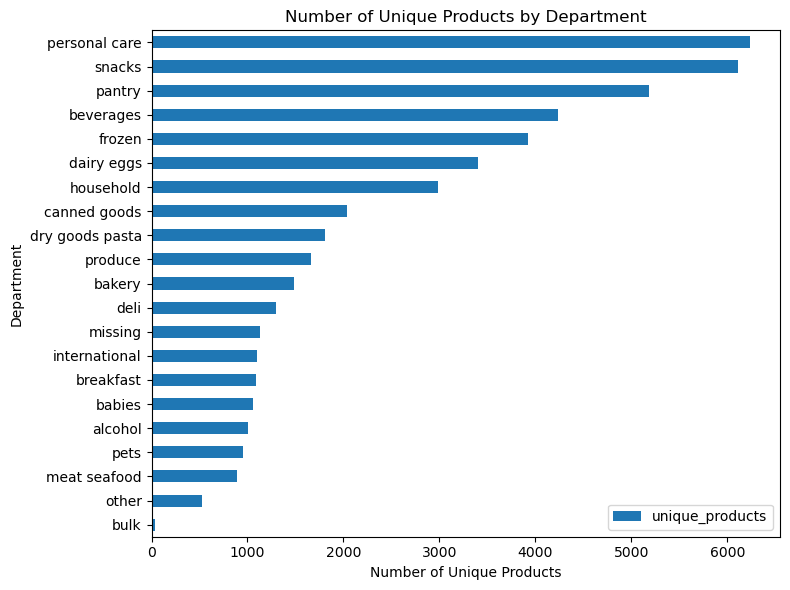

In [104]:
# Plot number of unique products per department
unique_products_per_dept_named.sort_values('unique_products').plot.barh(
    x='department',
    y='unique_products',
    figsize=(8,6)
)

plt.title('Number of Unique Products by Department')
plt.xlabel('Number of Unique Products')
plt.ylabel('Department')
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'unique_products_per_department.png'), dpi=300)

plt.show()

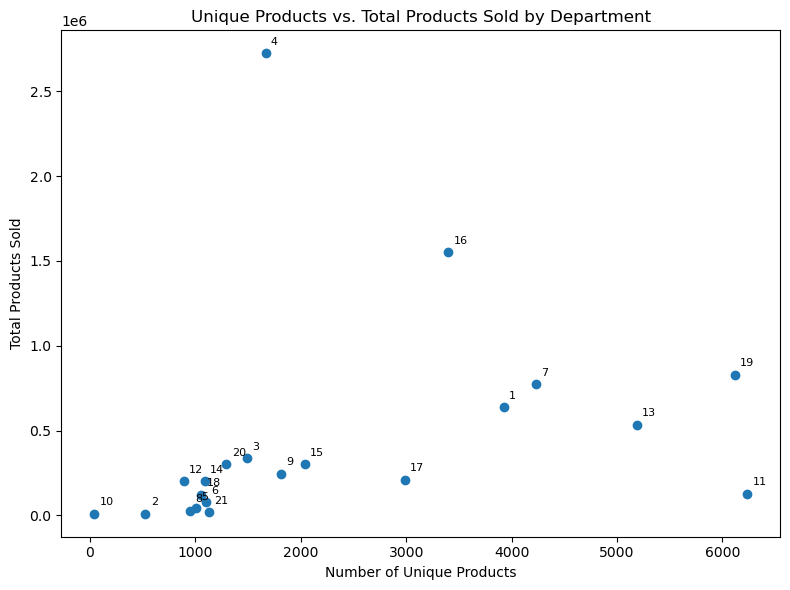

In [107]:
# Merge unique product counts with total sales data
dept_comparison = unique_products_per_dept_named.merge(
    products_per_dept_named[['department_id', 'total_products_sold']],
    on='department_id',
    how='left'
)

# Scatter plot
plt.figure(figsize=(8,6))
plt.scatter(dept_comparison['unique_products'], dept_comparison['total_products_sold'])

# Add department labels
for i, row in dept_comparison.iterrows():
    plt.text(row['unique_products']+50, row['total_products_sold']+50000, row['department_id'], fontsize=8)

plt.title('Unique Products vs. Total Products Sold by Department')
plt.xlabel('Number of Unique Products')
plt.ylabel('Total Products Sold')
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'unique_vs_total_products.png'), dpi=300)

plt.show()

In [97]:
# 1. Count total products sold by department_id
products_per_dept = (
    df_ords_prods_active_customers_small
    .groupby('department_id')['product_name']
    .count()
    .reset_index(name='total_products_sold')
)

# 2. Merge with department name mapping (assuming mapping df is called df_departments)
products_per_dept_named = products_per_dept.merge(
    df_departments.rename(columns={'Unnamed: 0': 'department_id'}),
    on='department_id',
    how='left'
)

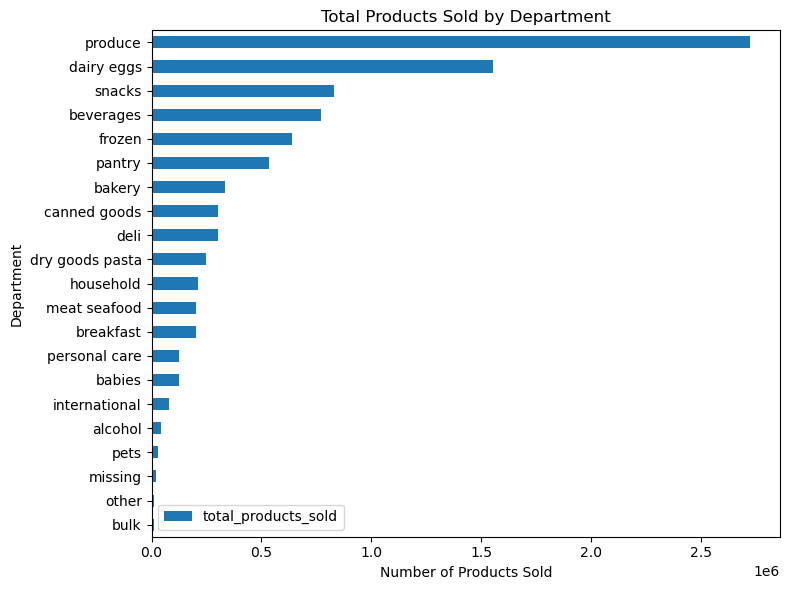

In [106]:
# 3. Sort by total products sold
products_per_dept_named = products_per_dept_named.sort_values('total_products_sold', ascending=False)

# 4. Plot horizontal bar chart
products_per_dept_named.sort_values('total_products_sold').plot.barh(
    x='department',
    y='total_products_sold',
    figsize=(8,6)
)

plt.title('Total Products Sold by Department')
plt.xlabel('Number of Products Sold')
plt.ylabel('Department')
plt.tight_layout()

# 5. Save chart
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'products_per_department.png'), dpi=300)
plt.show()

In [12]:
# Count number of products in each price range
price_counts = df_ords_prods_active_customers_small['price_range_loc'].value_counts()
price_counts

price_range_loc
Mid-range     6265843
Low-range     2904618
High-range     118007
Name: count, dtype: int64

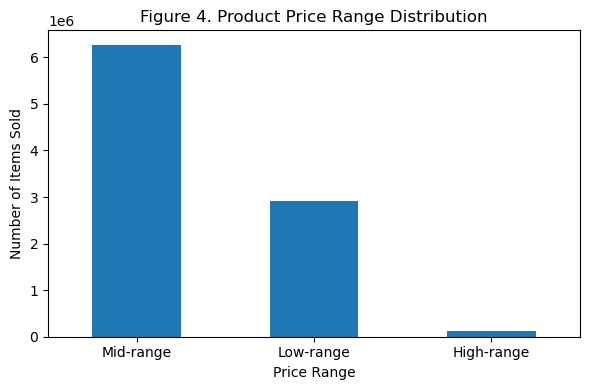

In [13]:
plt.figure(figsize=(6,4))
price_counts.plot(kind='bar')
plt.title('Figure 4. Product Price Range Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Items Sold')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'figure4_price_range_bar.png'), dpi=300)
plt.show()

# 08 CUSTOMER BEHAVIOUR IN DIFFERENT REGIONS

region
South        3093286
West         2376000
Midwest      2181453
Northeast    1637729
Name: count, dtype: int64


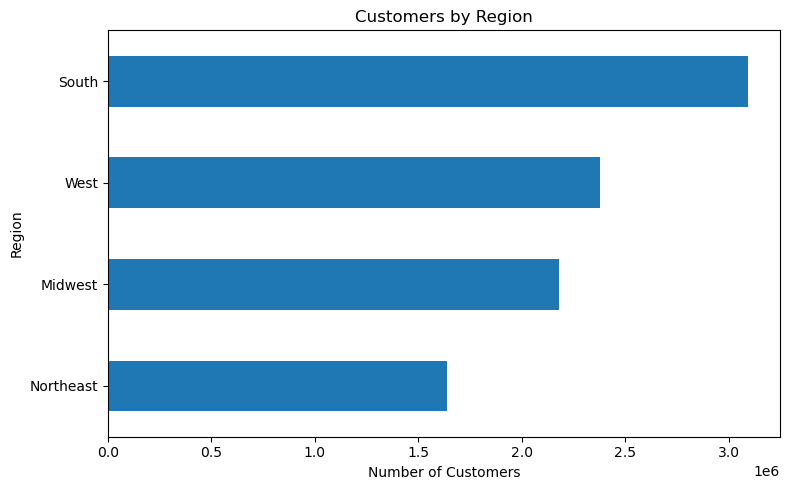

In [82]:
# Count customers by region
region_counts = df_ords_prods_active_customers_small['region'].value_counts()

print(region_counts)  # See raw counts

# Plot horizontal bar chart
region_counts.sort_values().plot.barh(
    figsize=(8,5)
)

plt.title('Customers by Region')
plt.xlabel('Number of Customers')
plt.ylabel('Region')
plt.tight_layout()

# Save chart to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customers_by_region.png'), dpi=300)

plt.show()

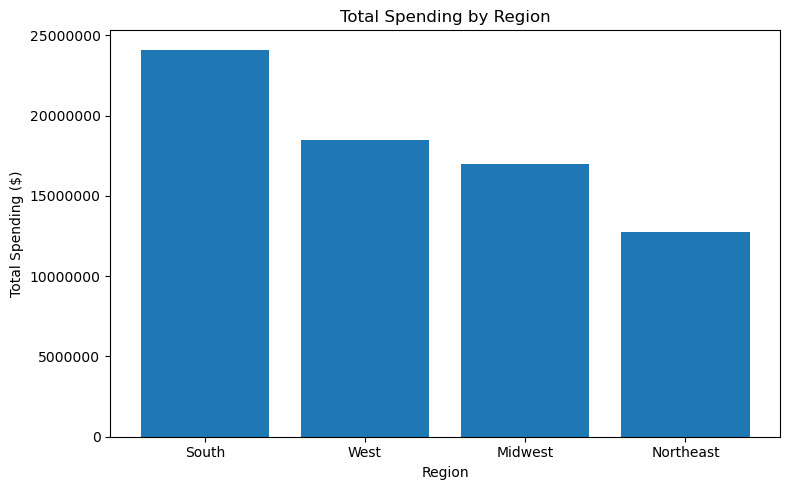

In [18]:
# Group by region and sum the 'prices' column to get total spend
region_spending = (df_ords_prods_active_customers_small
                   .groupby('region')['prices']
                   .sum()
                   .reset_index()
                   .sort_values('prices', ascending=False))

# Create vertical bar chart
plt.figure(figsize=(8,5))
plt.bar(region_spending['region'], region_spending['prices'])

# Add title and labels
plt.title("Total Spending by Region")
plt.xlabel("Region")
plt.ylabel("Total Spending ($)")

# Show plain style numbers on the y-axis
plt.ticklabel_format(style='plain', axis='y')

# Adjust layout
plt.tight_layout()

# Save the plot to your project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                         'total_spending_by_region.png'), dpi=300)

# Display the plot
plt.show()

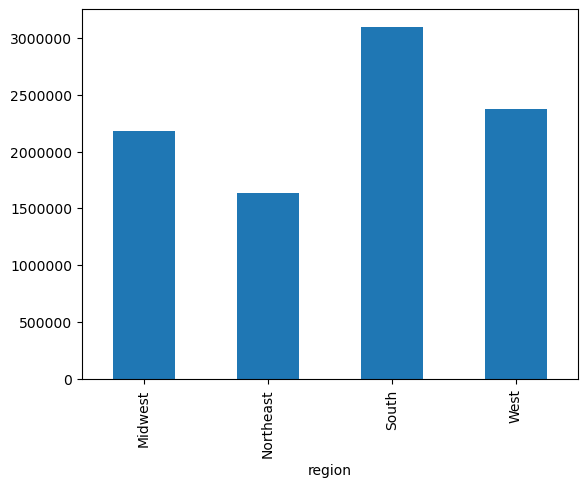

In [36]:
# Creating Bar Chart for region

bar_2 = df_ords_prods_active_customers_small['region'].value_counts().sort_index().plot.bar()
plt.ticklabel_format(style='plain', axis='y')

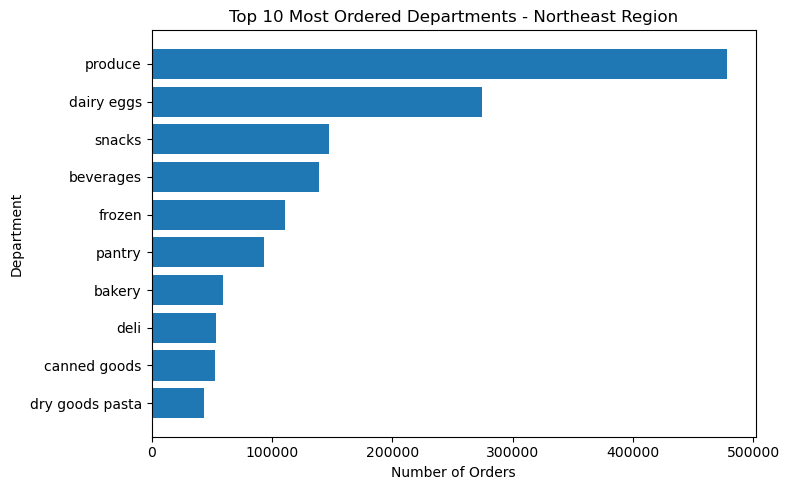

In [15]:
# Merge orders/customers data with departments data to get department names
df_region_dept = df_ords_prods_active_customers_small.merge(
    df_departments,
    left_on='department_id',       # department_id column in main df
    right_on='Unnamed: 0',         # department_id column in df_departments
    how='left'
)

# Filter for Northeast region only
northeast_data = df_region_dept[df_region_dept['region'] == 'Northeast']

# Group by department and count the number of orders
northeast_counts = (northeast_data
                    .groupby('department')['order_id']
                    .count()
                    .reset_index()
                    .sort_values('order_id', ascending=False))

# Select Top 10 departments only
northeast_top10 = northeast_counts.head(10)

# Create horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(northeast_top10['department'], northeast_top10['order_id'])

# Add title and labels
plt.title("Top 10 Most Ordered Departments - Northeast Region")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

# Show plain style numbers on the x-axis
plt.ticklabel_format(style='plain', axis='x')

# Invert y-axis so the highest value is on top
plt.gca().invert_yaxis()

# Adjust layout
plt.tight_layout()

# Save the plot as PNG
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','departments_by_region_Northeast_top10.png'), dpi=300)

# Display the plot
plt.show()

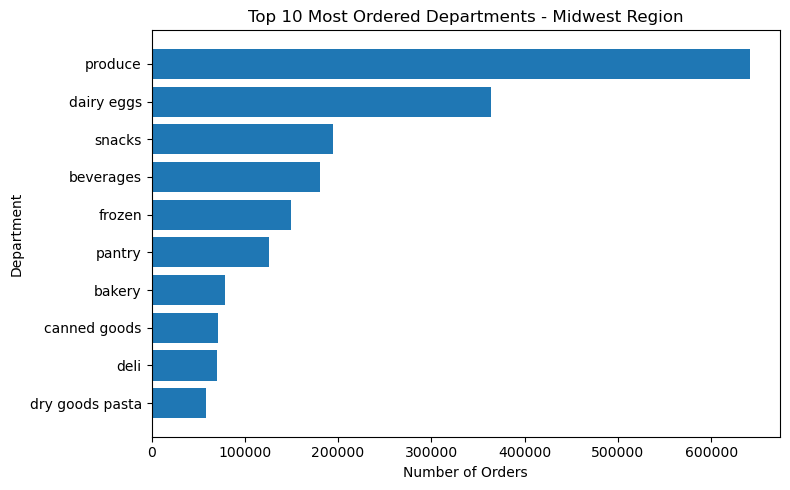

In [14]:
# Merge orders/customers data with departments data to get department names
df_region_dept = df_ords_prods_active_customers_small.merge(
    df_departments,
    left_on='department_id',       # department_id column in main df
    right_on='Unnamed: 0',         # department_id column in df_departments
    how='left'
)

# Filter for Midwest region only
midwest_data = df_region_dept[df_region_dept['region'] == 'Midwest']

# Group by department and count the number of orders
midwest_counts = (midwest_data
                  .groupby('department')['order_id']
                  .count()
                  .reset_index()
                  .sort_values('order_id', ascending=False))

# Select Top 10 departments only
midwest_top10 = midwest_counts.head(10)

# Create horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(midwest_top10['department'], midwest_top10['order_id'])

# Add title and labels
plt.title("Top 10 Most Ordered Departments - Midwest Region")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

# Show plain style numbers on the x-axis
plt.ticklabel_format(style='plain', axis='x')

# Invert y-axis so the highest value is on top
plt.gca().invert_yaxis()

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the plot as PNG
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations','departments_by_region_Midwest_top10.png'), dpi=300)

# Display the plot
plt.show()

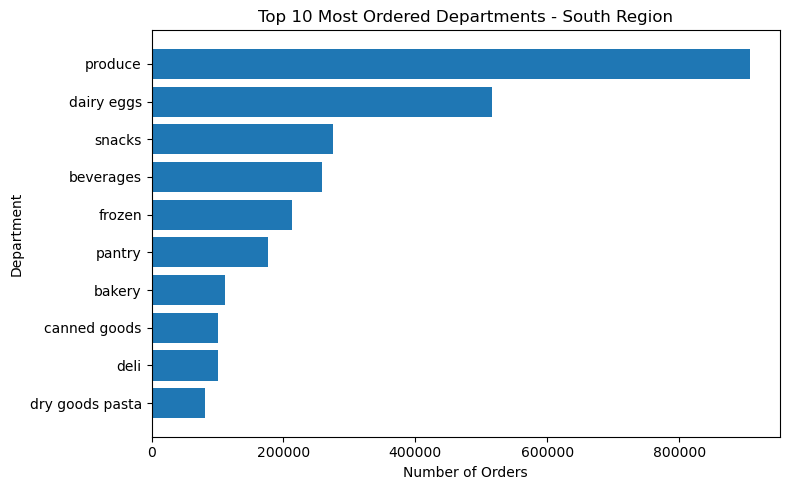

In [16]:
# Filter for South region only
south_data = df_region_dept[df_region_dept['region'] == 'South']

# Group by department and count the number of orders
south_counts = (south_data
                .groupby('department')['order_id']
                .count()
                .reset_index()
                .sort_values('order_id', ascending=False))

# Select Top 10 departments only
south_top10 = south_counts.head(10)

# Create horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(south_top10['department'], south_top10['order_id'])

# Add title and labels
plt.title("Top 10 Most Ordered Departments - South Region")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

# Show plain style numbers on the x-axis
plt.ticklabel_format(style='plain', axis='x')

# Invert y-axis so the highest value is on top
plt.gca().invert_yaxis()

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the plot to your project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                         'departments_by_region_South_top10_horizontal.png'), dpi=300)

# Display the plot
plt.show()

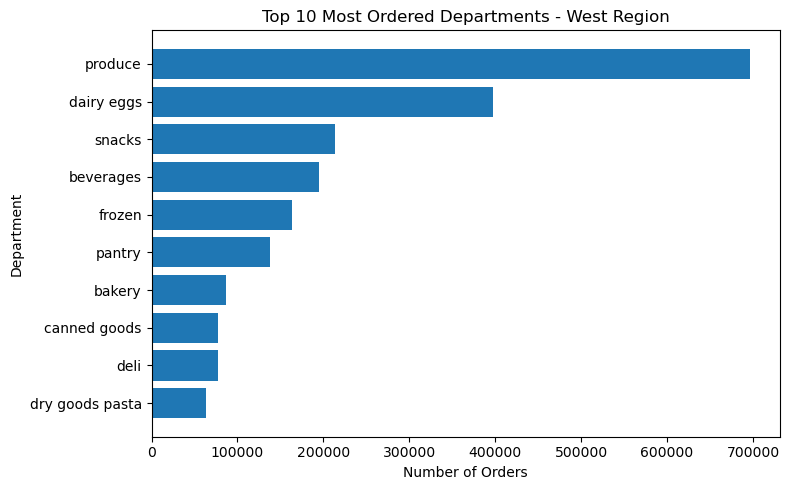

In [17]:
# Filter for West region only
west_data = df_region_dept[df_region_dept['region'] == 'West']

# Group by department and count the number of orders
west_counts = (west_data
               .groupby('department')['order_id']
               .count()
               .reset_index()
               .sort_values('order_id', ascending=False))

# Select Top 10 departments only
west_top10 = west_counts.head(10)

# Create horizontal bar chart
plt.figure(figsize=(8,5))
plt.barh(west_top10['department'], west_top10['order_id'])

# Add title and labels
plt.title("Top 10 Most Ordered Departments - West Region")
plt.xlabel("Number of Orders")
plt.ylabel("Department")

# Show plain style numbers on the x-axis
plt.ticklabel_format(style='plain', axis='x')

# Invert y-axis so the highest value is on top
plt.gca().invert_yaxis()

# Adjust layout to avoid clipping
plt.tight_layout()

# Save the plot to your project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                         'departments_by_region_West_top10_horizontal.png'), dpi=300)

# Display the plot
plt.show()

In [22]:
top10products_west = (
    df_ords_prods_active_customers_small[
     df_ords_prods_active_customers_small['region'] == 'West'
    ]['product_name'].value_counts().head(10))
top10products_west

product_name
Banana                    34509
Bag of Organic Bananas    28283
Organic Strawberries      19638
Organic Baby Spinach      17776
Organic Hass Avocado      16528
Organic Avocado           12546
Large Lemon               10968
Strawberries              10528
Limes                     10314
Organic Raspberries       10214
Name: count, dtype: int64

In [23]:
top10products_northeast = (
    df_ords_prods_active_customers_small[
     df_ords_prods_active_customers_small['region'] == 'Northeast'
    ]['product_name'].value_counts().head(10))
top10products_northeast

product_name
Banana                    23955
Bag of Organic Bananas    19609
Organic Strawberries      13683
Organic Baby Spinach      12030
Organic Hass Avocado      11099
Organic Avocado            9102
Large Lemon                7698
Limes                      7207
Organic Whole Milk         7204
Organic Raspberries        7067
Name: count, dtype: int64

In [24]:
top10products_midwest = (
    df_ords_prods_active_customers_small[
     df_ords_prods_active_customers_small['region'] == 'Midwest'
    ]['product_name'].value_counts().head(10))
top10products_midwest

product_name
Banana                    31618
Bag of Organic Bananas    25793
Organic Strawberries      17881
Organic Baby Spinach      16130
Organic Hass Avocado      14390
Organic Avocado           11900
Large Lemon               10550
Strawberries               9701
Limes                      9657
Organic Raspberries        9398
Name: count, dtype: int64

In [25]:
top10products_south = (
    df_ords_prods_active_customers_small[
     df_ords_prods_active_customers_small['region'] == 'South'
    ]['product_name'].value_counts().head(10))
top10products_south

product_name
Banana                    45396
Bag of Organic Bananas    35967
Organic Strawberries      25642
Organic Baby Spinach      23339
Organic Hass Avocado      20088
Organic Avocado           16821
Large Lemon               14420
Strawberries              13676
Organic Whole Milk        13470
Limes                     13467
Name: count, dtype: int64

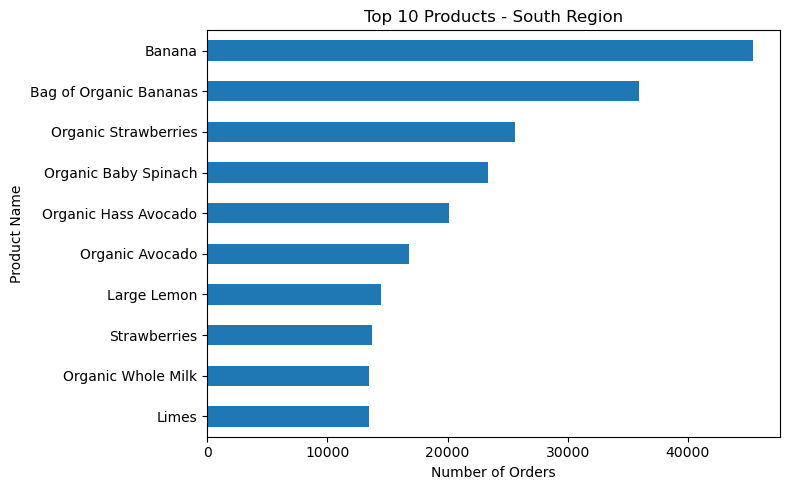

In [26]:
# Create and save a horizontal bar chart for Top 10 Products in South region
top10products_south.sort_values().plot.barh(
    figsize=(8, 5),
)

plt.title('Top 10 Products - South Region')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

# Save to your project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top10_south_products.png'), dpi=300)

plt.show()

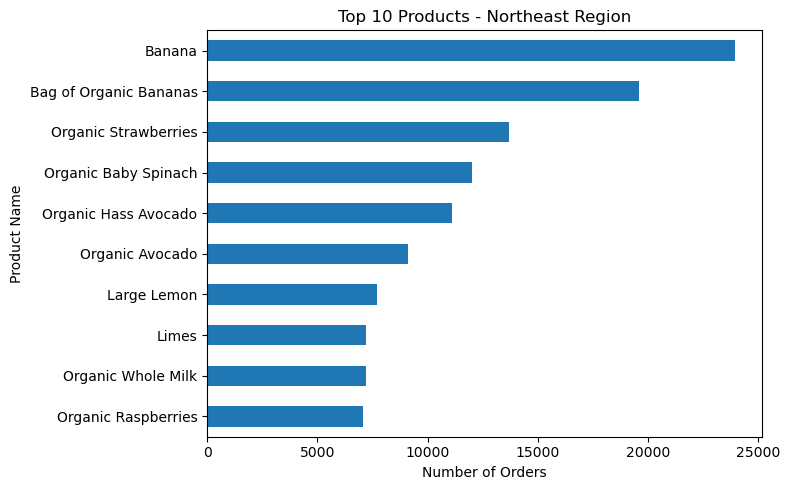

In [29]:
# Create and save a horizontal bar chart for Top 10 Products in Northeast region
top10products_northeast.sort_values().plot.barh(
    figsize=(8, 5),
)

plt.title('Top 10 Products - Northeast Region')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

# Save to your project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top10_northeast_products.png'), dpi=300)

plt.show()

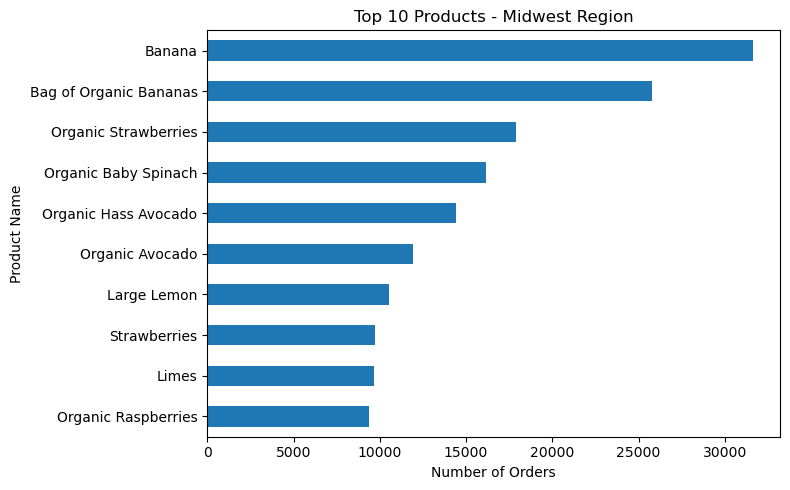

In [28]:
# Create and save a horizontal bar chart for Top 10 Products in Midwest region
top10products_midwest.sort_values().plot.barh(
    figsize=(8, 5),
)

plt.title('Top 10 Products - Midwest Region')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

# Save to your project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top10_midwest_products.png'), dpi=300)

plt.show()

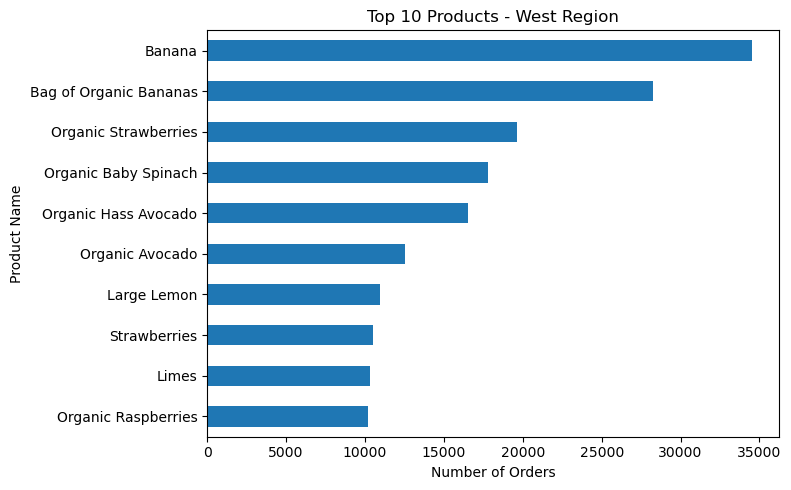

In [30]:
# Create and save a horizontal bar chart for Top 10 Products in West region
top10products_west.sort_values().plot.barh(
    figsize=(8, 5),
)

plt.title('Top 10 Products - West Region')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

# Save to your project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top10_west_products.png'), dpi=300)

plt.show()

In [15]:
# Calculate average spending per order per region
avg_spending_by_region = df_ords_prods_active_customers_small.groupby('region')['prices'].mean().round(2)
avg_spending_by_region

region
Midwest      7.79
Northeast    7.78
South        7.80
West         7.79
Name: prices, dtype: float32

region
Midwest      621326
Northeast    466212
South        882249
West         676660
Name: order_id, dtype: int64


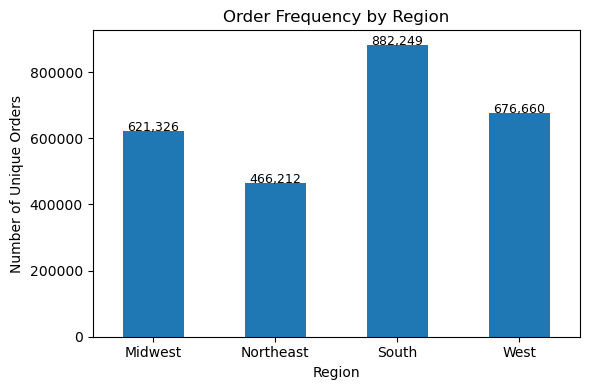

In [24]:
# Step 1: Count unique orders per region
orders_per_region = df_ords_prods_active_customers_small.groupby('region')['order_id'].nunique()

print(orders_per_region)

# Step 2: Bar chart of order frequency by region
import matplotlib.pyplot as plt
import os

plt.figure(figsize=(6,4))
orders_per_region.plot(kind='bar')

plt.title('Order Frequency by Region')
plt.xlabel('Region')
plt.ylabel('Number of Unique Orders')
plt.xticks(rotation=0)

# Add value labels on bars
for i, val in enumerate(orders_per_region):
    plt.text(i, val + 0.5, f"{val:,}", ha='center', fontsize=9)

plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'orders_by_region.png'), dpi=300)
plt.show()

In [38]:
# Filter for department 'baby' (id = 18)
baby_orders = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['department_id'] == 18
]

# Count orders by customer group
baby_by_marital_status = baby_orders['marital_status'].value_counts()

baby_by_marital_status

marital_status
married                             85816
single                              20624
divorced/widowed                    10485
living with parents and siblings     5827
Name: count, dtype: int64

In [33]:
   df_ords_prods_active_customers_small['age_group'].value_counts()

age_group
61-81    3032116
41-60    2911124
26-40    2185273
18-25    1159955
Name: count, dtype: int64

In [40]:
# Filter for Baby department (id = 18) AND marital_status = 'married'
baby_orders_married = df_ords_prods_active_customers_small[
    (df_ords_prods_active_customers_small['department_id'] == 18) &
    (df_ords_prods_active_customers_small['marital_status'] == 'married')
]

# Count orders by number of dependants
baby_by_dependants = baby_orders_married['n_dependants'].value_counts()

baby_by_dependants

n_dependants
2    29243
3    28868
1    27705
Name: count, dtype: int64

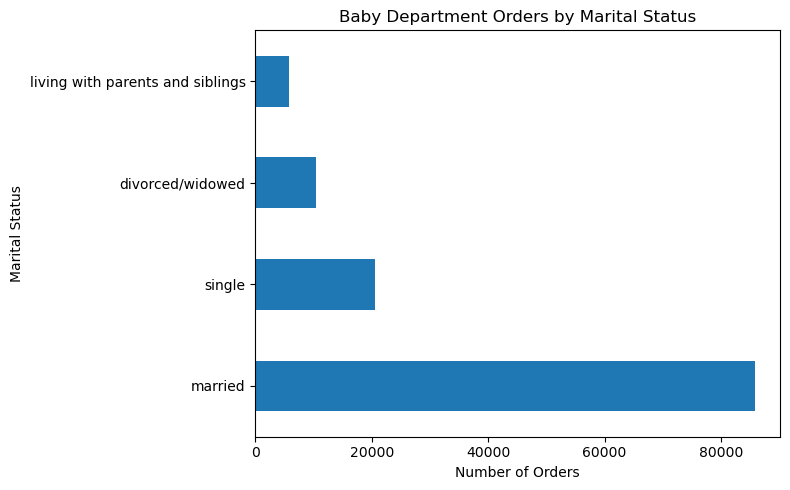

In [44]:
# Plot Baby department orders by marital status
baby_by_marital_status.plot.barh(
    figsize=(8,5)
)

plt.title('Baby Department Orders by Marital Status')
plt.xlabel('Number of Orders')
plt.ylabel('Marital Status')
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'baby_by_marital_status.png'), dpi=300)

plt.show()

In [45]:
# Filter for Pets department (id = 8)
pets_orders = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['department_id'] == 8
]

# Count orders by age group
pets_by_age_group = pets_orders['age_group'].value_counts()

print(pets_by_age_group)

age_group
61-81    9197
41-60    8554
26-40    6211
18-25    3765
Name: count, dtype: int64


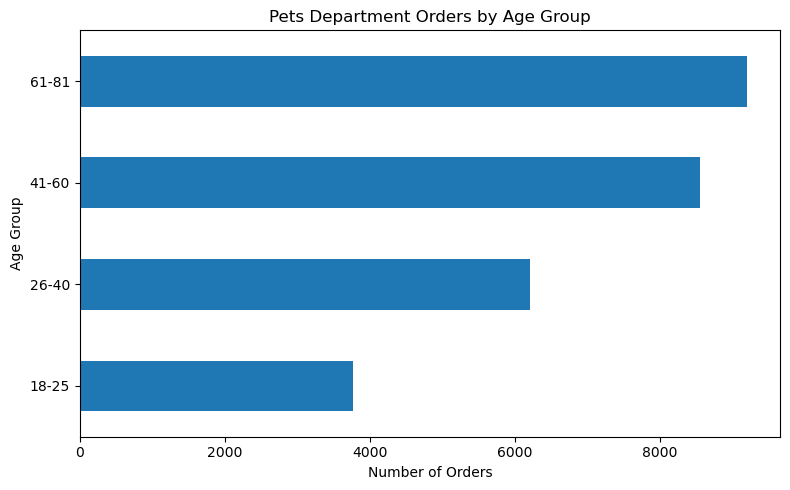

In [52]:
# Plot Pets department orders by age group
pets_by_age_group.sort_values().plot.barh(
    figsize=(8,5)
)

plt.title('Pets Department Orders by Age Group')
plt.xlabel('Number of Orders')
plt.ylabel('Age Group')
plt.tight_layout()

# Save to your visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pets_by_age_group.png'), dpi=300)

plt.show()

In [47]:
# Filter for Pets department (id = 8)
pets_orders = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['department_id'] == 8
]

# Count orders by age group
pets_by_marital_status = pets_orders['marital_status'].value_counts()

pets_by_marital_status

marital_status
married                             19139
single                               4591
divorced/widowed                     2404
living with parents and siblings     1593
Name: count, dtype: int64

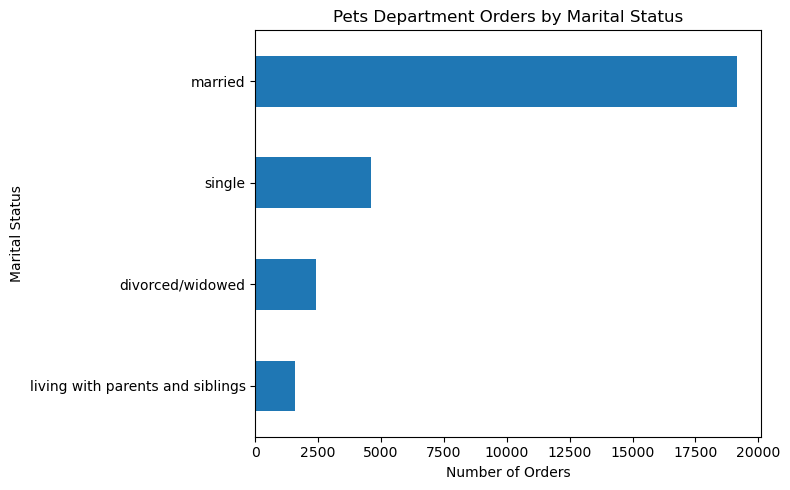

In [54]:
# Plot Pets department orders by marital status
pets_by_marital_status.sort_values().plot.barh(
    figsize=(8,5)
)

plt.title('Pets Department Orders by Marital Status')
plt.xlabel('Number of Orders')
plt.ylabel('Marital Status')
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pets_by_marital_status.png'), dpi=300)

plt.show()

In [73]:
# Create a list of keywords for vegan-related products
vegan_keywords = ['vegan', 'plant-based', 'meatless', 'tofu']

# Filter orders containing these keywords in product_name
vegan_orders = df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['product_name'].str.contains('|'.join(vegan_keywords), case=False, na=False)
]

In [74]:
vegan_customers = vegan_orders['user_id'].unique()
f"Number of vegan customers: {len(vegan_customers)}"

'Number of vegan customers: 19269'

In [75]:
vegan_orders['age_group'].value_counts()

age_group
61-81    15459
41-60    15051
26-40    11434
18-25     5899
Name: count, dtype: int64

In [88]:
df_ords_prods_active_customers_small['marital_status'].value_counts()

marital_status
married                             6522723
single                              1529658
divorced/widowed                     792446
living with parents and siblings     443641
Name: count, dtype: int64

In [76]:
vegan_orders['marital_status'].value_counts()

marital_status
married                             33295
single                               8183
divorced/widowed                     3980
living with parents and siblings     2385
Name: count, dtype: int64

In [78]:
vegan_orders['income_flag'].value_counts()

income_flag
Middle income 67,001–127,912    24996
High income 127,913–250,000     11538
Low income ≤ 67,000             11216
Very high income > 250,000         93
Name: count, dtype: int64

In [79]:
vegan_orders['region'].value_counts()

region
South        15911
West         12469
Midwest      11239
Northeast     8224
Name: count, dtype: int64

In [80]:
vegan_orders['avg_spending_flag'].value_counts()

avg_spending_flag
Low spender     47757
High spender       86
Name: count, dtype: int64

In [81]:
vegan_orders['loyalty_flag'].value_counts()

loyalty_flag
Regular customer    24863
Loyal customer      15392
New customer         7588
Name: count, dtype: int64

In [82]:
vegan_orders['department_id'].value_counts().head(10)

department_id
20    24987
1      4659
16     4524
19     4484
15     2228
13     1560
6      1370
11     1181
9      1055
14      869
Name: count, dtype: int64

In [86]:
df_ords_prods_active_customers_small[
    df_ords_prods_active_customers_small['department_id'] == 20
]['product_name'].value_counts().head(20)

product_name
Original Hummus                            20764
Uncured Genoa Salami                       11878
Organic Extra Firm Tofu                     8382
Organic Roasted Turkey Breast               8110
Oven Roasted Turkey Breast                  5704
Guacamole                                   5241
Roasted Turkey Breast                       4971
Roasted Red Pepper Hummus                   4815
Lemon Hummus                                4727
Organic Original Hommus                     3889
Uncured Slow Cooked Ham                     3831
Organic Roasted Sliced Chicken Breast       3505
Classic Hummus                              3404
Oven Roasted Turkey                         3397
Organic Uncured Sliced Black Forest Ham     3390
Roasted Pine Nut Hummus                     3241
Green Tea With Ginseng and Honey            3105
Firm Tofu                                   3098
Roasted Turkey                              2990
Smoked Turkey Breast Slices                 2775
Name: c

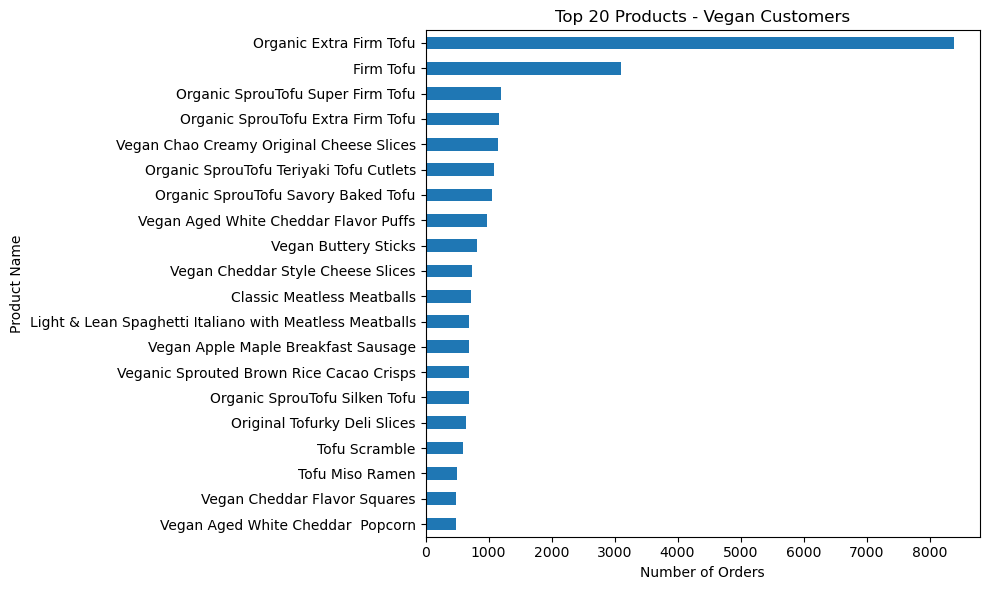

In [87]:
# Get top 20 vegan products
top20_vegan_products = vegan_orders['product_name'].value_counts().head(20)

# Plot as horizontal bar chart
top20_vegan_products.sort_values().plot.barh(
    figsize=(10,6)
)

plt.title('Top 20 Products - Vegan Customers')
plt.xlabel('Number of Orders')
plt.ylabel('Product Name')
plt.tight_layout()

# Save to visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'top20_vegan_products.png'), dpi=300)

plt.show()

# 09 ORDER VOLUME BY DEMOGRAPHICS & PRODUCT CATEGORY

In [25]:
df_small_copy = df_ords_prods_active_customers_small.copy().assign(department_name=lambda d: d['department_id'].map(df_departments.set_index('Unnamed: 0')['department']).fillna('Unknown').astype('category'))

In [27]:
df_small_copy.head()

,order_id,user_id,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,new_customer,product_id,add_to_cart_order,reordered,...,age,date_joined,n_dependants,marital_status,income,region,low-activity_flag,age_group,income_flag,department_name
0,2539329,1,1,2,8,NaN,True,196,1,0,...,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000",beverages
2,2539329,1,1,2,8,NaN,True,12427,3,0,...,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000",snacks
3,2539329,1,1,2,8,NaN,True,26088,4,0,...,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000",snacks
6,2398795,1,2,3,7,15.0,False,10258,2,0,...,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000",snacks
10,2398795,1,2,3,7,15.0,False,13032,6,0,...,31,2019-02-17,3,married,40423,South,False,26-40,"Low income ≤ 67,000",breakfast


In [85]:
# Grouping
profile_region_dept = (
    df_small_copy
      .groupby(['age_group', 'region', 'department_name'], observed=True)
      .size()
      .reset_index(name='order_count')
)

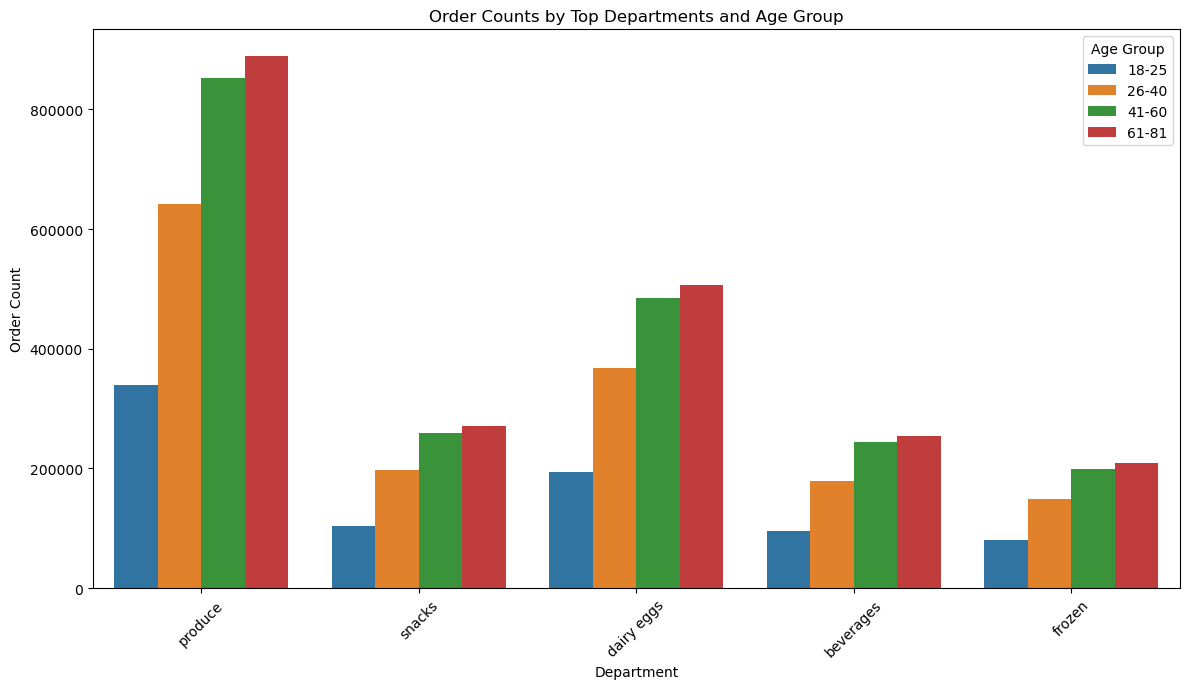

In [45]:
# Departments to keep
keep = ['produce', 'snacks', 'dairy eggs', 'beverages', 'frozen']

# Collapse regions, filter to selected depts, and prepare for plotting
plot_df = (profile_region_dept[profile_region_dept['department_name'].isin(keep)]
           .groupby(['department_name','age_group'], observed=True)['order_count']
           .sum().reset_index())

# Fix the order on the x-axis
plot_df['department_name'] = pd.Categorical(plot_df['department_name'], categories=keep, ordered=True)

plt.figure(figsize=(12,7))
sns.barplot(data=plot_df, x='department_name', y='order_count', hue='age_group',
            order=keep, errorbar=None)
plt.title('Order Counts by Top Departments and Age Group')
plt.xlabel('Department'); plt.ylabel('Order Count'); plt.legend(title='Age Group')
plt.xticks(rotation=45); plt.tight_layout(); 

# Save plot to your project visuals folder
save_path = os.path.join(
    path, '04 Analysis', 'Visualizations',
    f'order_counts_top_by_department_agegroup.png' 
)
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()


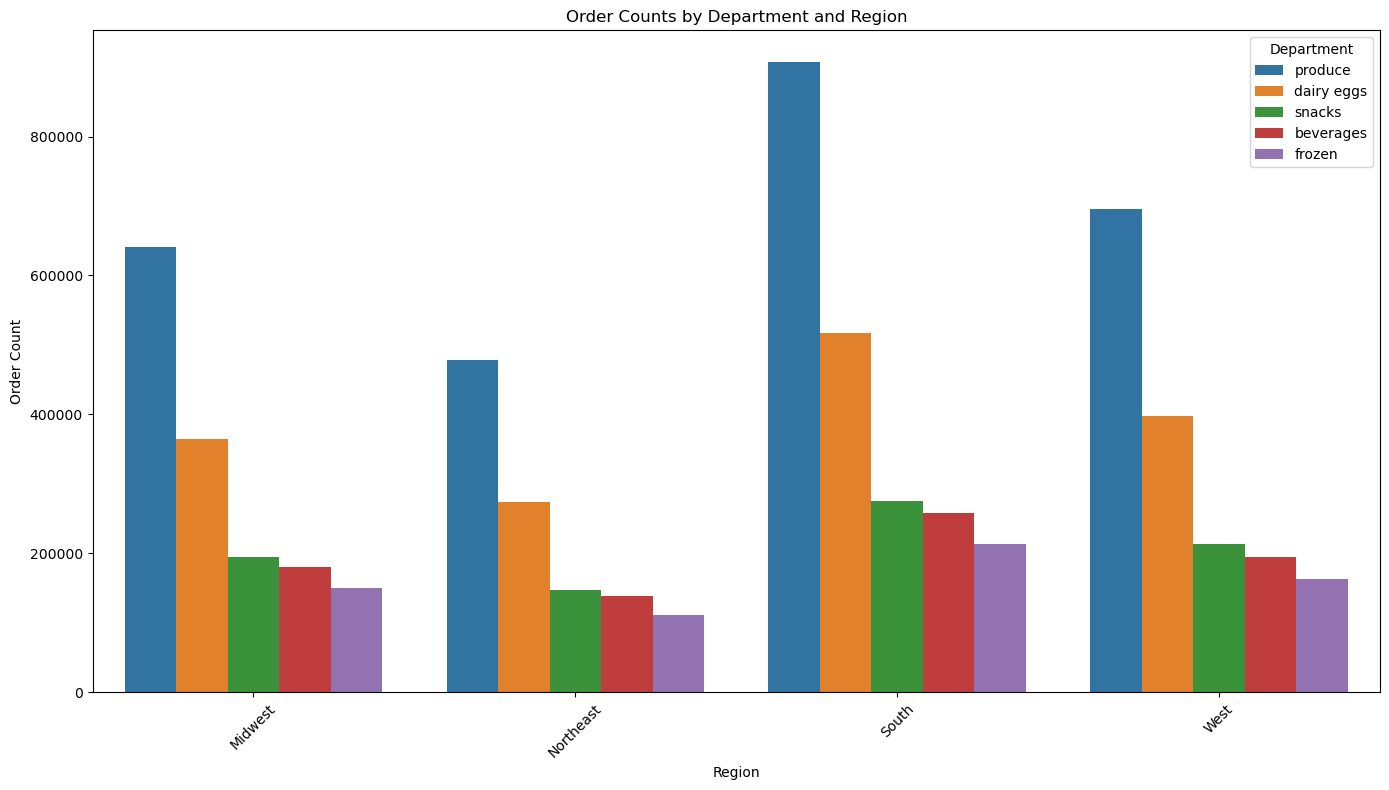

In [48]:
# Top 5 departments overall
top_departments = (profile_region_dept
                   .groupby('department_name', observed=True)['order_count']
                   .sum().nlargest(5).index.tolist())

# Sum over age groups and keep only selected departments
plot_df = (profile_region_dept[profile_region_dept['department_name'].isin(top_departments)]
           .groupby(['region', 'department_name'], observed=True)['order_count']
           .sum().reset_index())

region_order = ['Midwest', 'Northeast', 'South', 'West']  # x-axis order

plt.figure(figsize=(14, 8))
sns.barplot(
    data=plot_df,
    x='region',
    y='order_count',
    hue='department_name',
    order=region_order,
    hue_order=top_departments,
    errorbar=None
)
plt.title('Order Counts by Department and Region')
plt.xlabel('Region')               # <- was "Department"
plt.ylabel('Order Count')
plt.legend(title='Department')     # <- legend shows departments
plt.xticks(rotation=45)
plt.tight_layout()

# Save plot
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                         'order_counts_by_department_and_region_top5.png'),
            dpi=300, bbox_inches='tight')

plt.show()

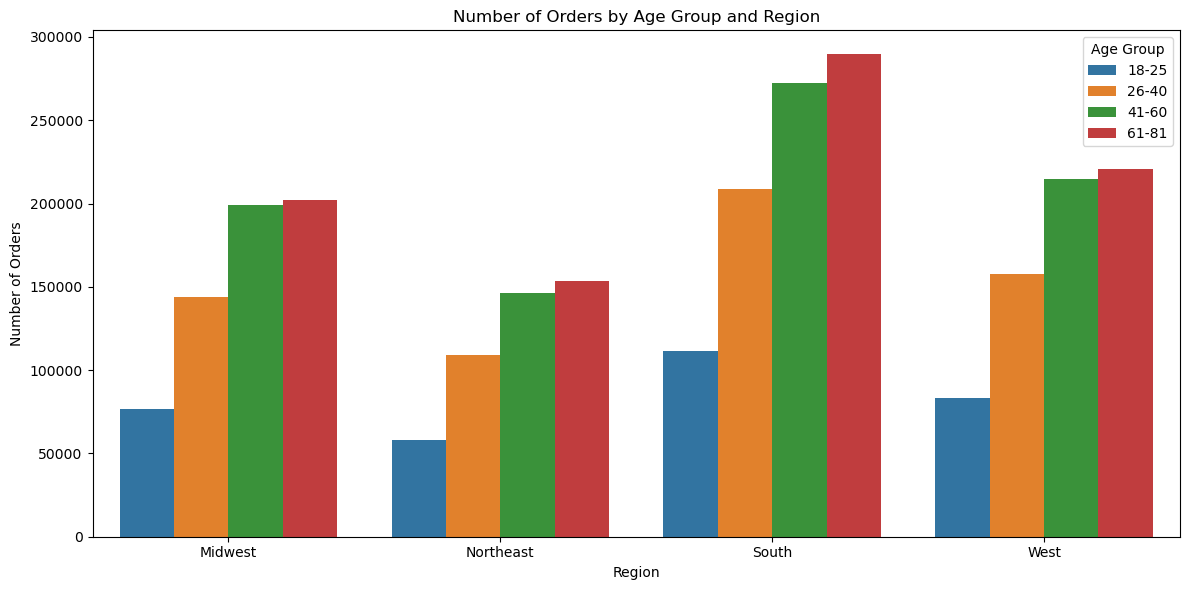

In [49]:
region_order = ['Midwest', 'Northeast', 'South', 'West']
age_order    = ['18-25', '26-40', '41-60', '61-81']

plt.figure(figsize=(12,6))
sns.barplot(
    data=df_small_copy,           
    x='region',
    y='order_id',                  # count unique orders
    hue='age_group',
    estimator=pd.Series.nunique,   # unique orders per group
    errorbar=None,
    order=region_order,
    hue_order=age_order
)
plt.title('Number of Orders by Age Group and Region')
plt.xlabel('Region')
plt.ylabel('Number of Orders')
plt.legend(title='Age Group')
plt.tight_layout()

# Save
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations',
                         'orders_by_age_group_and_region.png'),
            dpi=300, bbox_inches='tight')
plt.show()

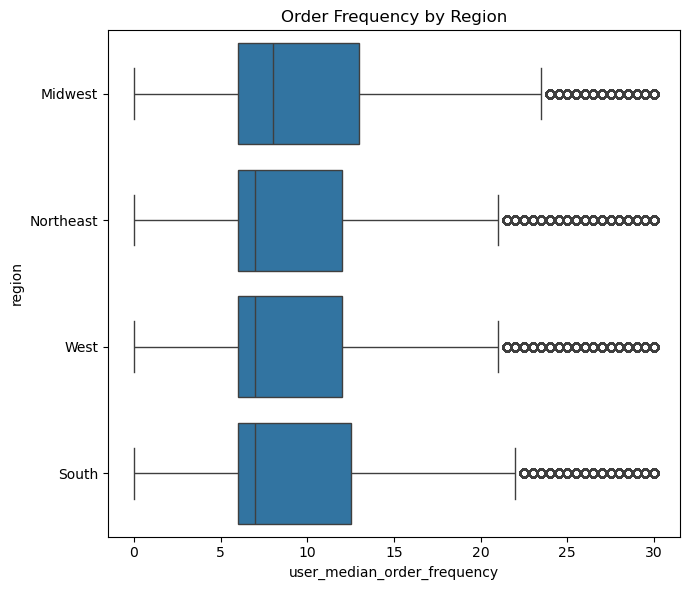

In [77]:
# --- Boxplot : Order frequency by region (horizontal) ---

region_order = ['Midwest', 'Northeast', 'West', 'South']  # match slide order
freq_col = 'user_median_order_frequency'                 

plt.figure(figsize=(7, 6))
sns.boxplot(
    data=df_small_copy,
    x=freq_col,
    y='region',
    order=region_order
)
plt.title('Order Frequency by Region')
plt.xlabel(freq_col)
plt.ylabel('region')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_order_frequency_by_region.png'),
            dpi=300, bbox_inches='tight')
plt.show()

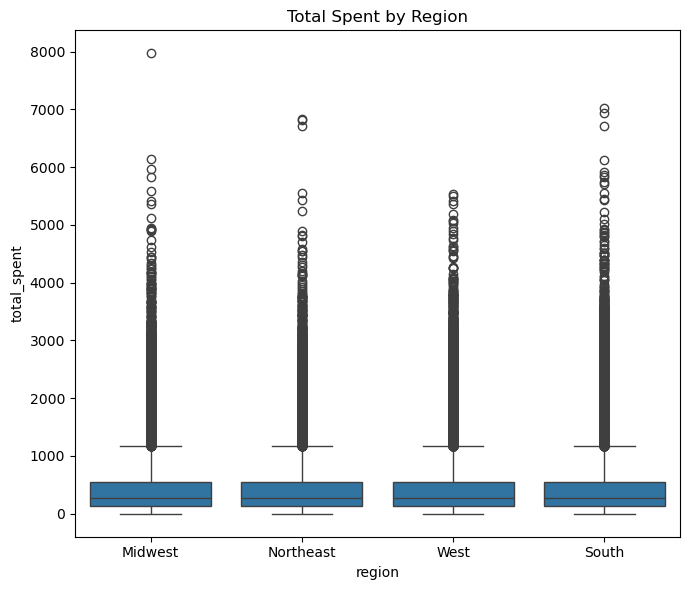

In [76]:
# --- Boxplot : Total spent by region (computed from prices) ---

# One row per user: total_spent and their region
user_spend = (
    df_small_copy
      .groupby('user_id')
      .agg(total_spent=('prices', 'sum'),   # sum of prices per user
           region=('region', 'first'))      # region for that user
      .reset_index()
)

region_order = ['Midwest', 'Northeast', 'West', 'South']

plt.figure(figsize=(7, 6))
sns.boxplot(data=user_spend, x='region', y='total_spent', order=region_order)
plt.title('Total Spent by Region')
plt.xlabel('region'); plt.ylabel('total_spent')
plt.tight_layout()
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'boxplot_total_spent_by_region.png'),
            dpi=300, bbox_inches='tight')
plt.show()

# 10 CUSTOMER VALUE PYRAMID

In [65]:
# --- Step 1: Aggregate metrics per user ---
total_spend = df_ords_prods_active_customers_small.groupby('user_id')['prices'].sum()
avg_spend_order = df_ords_prods_active_customers_small.groupby('user_id')['prices'].mean()
user_median_order_frequency = df_ords_prods_active_customers_small.groupby('user_id')['user_median_order_frequency'].first()

# --- Step 2: Combine into one DataFrame ---
customer_metrics = pd.concat(
    [total_spend, avg_spend_order, user_median_order_frequency],
    axis=1
)

# --- Step 3: Rename columns for clarity ---
customer_metrics.columns = ['total_spend', 'avg_spend_order', 'median_order_frequency']

# --- Step 4: check ---
print(customer_metrics.head())

         total_spend  avg_spend_order  median_order_frequency
user_id                                                      
1          98.900002         5.817647                    20.5
2         514.400024         8.037500                    13.0
3         188.899994         8.213043                    10.0
4          30.599998        10.200000                    20.0
7         487.200012         6.583784                     9.0


In [66]:
print(customer_metrics.describe())

         total_spend  avg_spend_order  median_order_frequency
count  162527.000000    162527.000000           162527.000000
mean      445.156219         7.752604               13.760219
std       513.191284         1.244525                8.367545
min         1.000000         1.000000                0.000000
25%       133.800003         7.100000                7.000000
50%       267.200012         7.778378               11.000000
75%       549.200012         8.438047               19.000000
max      7969.700195        25.000000               30.000000


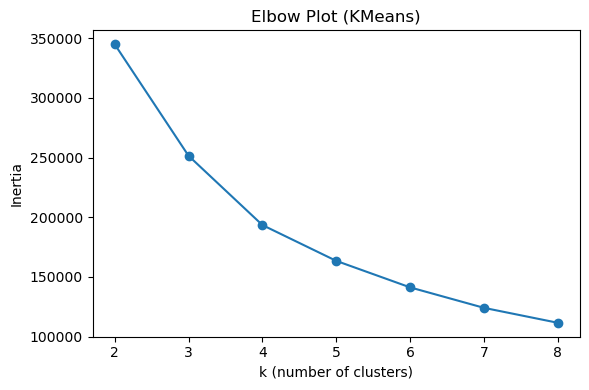

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

X = customer_metrics[['total_spend','avg_spend_order','median_order_frequency']].copy()

# scale
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# elbow (k=2..8)
inertias = []
Ks = range(2,9)
for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=42)
    km.fit(X_scaled)
    inertias.append(km.inertia_)

plt.figure(figsize=(6,4))
plt.plot(Ks, inertias, marker='o')
plt.title('Elbow Plot (KMeans)')
plt.xlabel('k (number of clusters)')
plt.ylabel('Inertia')
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','elbow_customer_metrics.png'), dpi=300)
plt.show()

In [68]:
k = 4  # <- set after looking at the elbow
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
customer_metrics['cluster'] = kmeans.fit_predict(X_scaled)

print(customer_metrics['cluster'].value_counts().sort_index())

cluster
0    64605
1    39007
2    17802
3    41113
Name: count, dtype: int64


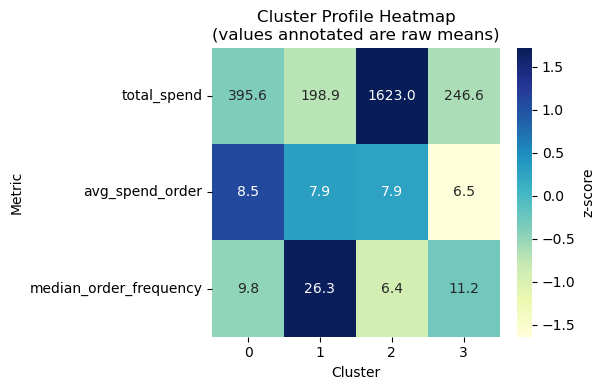

In [69]:
# raw means
profile = customer_metrics.groupby('cluster')[['total_spend','avg_spend_order','median_order_frequency']].mean()

# z-scored for heatmap (so differences pop)
z = (profile - profile.mean()) / profile.std(ddof=0)

plt.figure(figsize=(6,4))
sns.heatmap(z.T, annot=profile.T.round(1), fmt='.1f', cmap='YlGnBu', cbar_kws={'label':'z-score'})
plt.title('Cluster Profile Heatmap\n(values annotated are raw means)')
plt.ylabel('Metric'); plt.xlabel('Cluster')
plt.tight_layout()
plt.savefig(os.path.join(path,'04 Analysis','Visualizations','cluster_profiles_heatmap.png'), dpi=300)
plt.show()

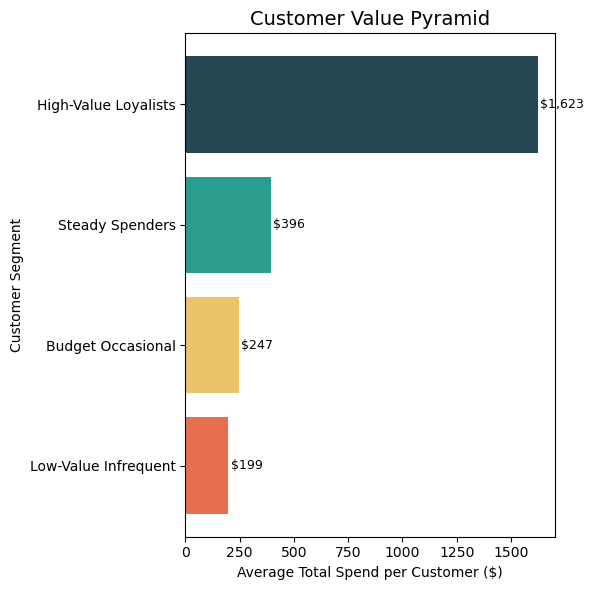

In [74]:
# --- Step 1: Prepare summary table of cluster metrics ---
# This table aggregates key spending and frequency metrics for each customer cluster.
# It will help us understand the relative value of each customer segment.

cluster_summary = customer_metrics.groupby('cluster').agg(
    total_spend=('total_spend', 'mean'),            # Average total spend per customer in the cluster
    avg_spend_order=('avg_spend_order', 'mean'),    # Average spend per order for the cluster
    median_order_frequency=('median_order_frequency', 'mean')  # Average median order frequency
).reset_index()

# --- Step 2: Add descriptive labels for clusters ---
# These labels will replace numeric cluster IDs to make the chart more stakeholder-friendly.
cluster_labels = {
    0: 'Steady Spenders',        # Moderate spending, consistent orders
    1: 'Low-Value Infrequent',   # Low spend, low order frequency
    2: 'High-Value Loyalists',   # Highest spend and loyalty
    3: 'Budget Occasional'       # Low spend, occasional orders
}
cluster_summary['label'] = cluster_summary['cluster'].map(cluster_labels)

# --- Step 3: Sort clusters by total spend (highest at the top of pyramid) ---
cluster_summary = cluster_summary.sort_values('total_spend', ascending=False)

# --- Step 4: Define colors consistent with earlier visuals ---
# Make sure each cluster keeps the same color across all charts for clarity.
cluster_colors = {
    'High-Value Loyalists': '#264653',   
    'Steady Spenders': '#2a9d8f',        
    'Budget Occasional': '#e9c46a',      
    'Low-Value Infrequent': '#e76f51'    
}
bar_colors = cluster_summary['label'].map(cluster_colors)

# --- Step 5: Plot the Customer Value Pyramid ---
plt.figure(figsize=(6, 6))
plt.barh(
    cluster_summary['label'],        # Y-axis: Cluster names
    cluster_summary['total_spend'],  # X-axis: Average total spend
    color=bar_colors                 # Keep colors consistent with cluster IDs
)

# Invert y-axis so the highest value cluster is shown at the top
plt.gca().invert_yaxis()

# Add chart title and axis labels
plt.title('Customer Value Pyramid', fontsize=14)
plt.xlabel('Average Total Spend per Customer ($)')
plt.ylabel('Customer Segment')

# Annotate spend values directly on the bars
for i, val in enumerate(cluster_summary['total_spend']):
    plt.text(val + 10, i, f"${val:,.0f}", va='center', fontsize=9)

plt.tight_layout()

# Save the plot to the project visuals folder
plt.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'customer_value_pyramid.png'), dpi=300)

# Display the plot
plt.show()